In [ ]:
#extract dataset from zip file
from zipfile import ZipFile
Dataset = '/content/KF5012Dataset.zip'

with ZipFile(Dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
import cv2
import numpy as np
import os
import shutil
import glob
from collections import Counter
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from IPython.display import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
datasetDir = '/content/dataset'

In [ ]:
# Function to load images from the dataset directory
def load_images(datasetDir):
    image_paths = []
    labels = []

    # Loop through each person in the training directory
    for person_dir in os.listdir(datasetDir):
        if os.path.isdir(os.path.join(datasetDir, person_dir)):
            for image_path in glob.glob(os.path.join(datasetDir, person_dir, "*.jpg")):
                image_paths.append(image_path)
                labels.append(person_dir)
    return image_paths, labels


In [ ]:
# Load images and labels
image_paths, labels = load_images(datasetDir)

In [ ]:
#before preprocessing
print(labels)

['pins_barbara palvin', 'pins_barbara palvin', 'pins_barbara palvin', 'pins_barbara palvin', 'pins_barbara palvin', 'pins_barbara palvin', 'pins_barbara palvin', 'pins_barbara palvin', 'pins_barbara palvin', 'pins_barbara palvin', 'pins_barbara palvin', 'pins_barbara palvin', 'pins_barbara palvin', 'pins_barbara palvin', 'pins_barbara palvin', 'pins_barbara palvin', 'pins_barbara palvin', 'pins_barbara palvin', 'pins_barbara palvin', 'pins_barbara palvin', 'pins_barbara palvin', 'pins_barbara palvin', 'pins_barbara palvin', 'pins_barbara palvin', 'pins_barbara palvin', 'pins_barbara palvin', 'pins_barbara palvin', 'pins_barbara palvin', 'pins_barbara palvin', 'pins_barbara palvin', 'pins_barbara palvin', 'pins_barbara palvin', 'pins_barbara palvin', 'pins_barbara palvin', 'pins_barbara palvin', 'pins_barbara palvin', 'pins_barbara palvin', 'pins_barbara palvin', 'pins_barbara palvin', 'pins_barbara palvin', 'pins_barbara palvin', 'pins_barbara palvin', 'pins_barbara palvin', 'pins_barb

In [ ]:
#before preprocessing
print(image_paths)

['/content/dataset/pins_barbara palvin/barbara palvin128_774.jpg', '/content/dataset/pins_barbara palvin/barbara palvin29_890.jpg', '/content/dataset/pins_barbara palvin/barbara palvin147_792.jpg', '/content/dataset/pins_barbara palvin/barbara palvin108_757.jpg', '/content/dataset/pins_barbara palvin/barbara palvin81_934.jpg', '/content/dataset/pins_barbara palvin/barbara palvin130_777.jpg', '/content/dataset/pins_barbara palvin/barbara palvin39_898.jpg', '/content/dataset/pins_barbara palvin/barbara palvin241_876.jpg', '/content/dataset/pins_barbara palvin/barbara palvin199_835.jpg', '/content/dataset/pins_barbara palvin/barbara palvin21_847.jpg', '/content/dataset/pins_barbara palvin/barbara palvin201_839.jpg', '/content/dataset/pins_barbara palvin/barbara palvin92_942.jpg', '/content/dataset/pins_barbara palvin/barbara palvin30_891.jpg', '/content/dataset/pins_barbara palvin/barbara palvin101_751.jpg', '/content/dataset/pins_barbara palvin/barbara palvin45_904.jpg', '/content/datase

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
#preprocessing
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   rotation_range=45,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   validation_split = 0.2)

test_datagen = ImageDataGenerator(rescale=1./255,
                                  validation_split = 0.2)

In [ ]:
# Extract features for each image
training_set = train_datagen.flow_from_directory(datasetDir,
                                       target_size=(150, 150),
                                                batch_size=32,
                                     class_mode='categorical',
                                            subset='training')

validation_set = test_datagen.flow_from_directory(datasetDir,
                                        target_size=(150, 150),
                                                 batch_size=32,
                                      class_mode='categorical',
                                               shuffle = False,
                                           subset='validation')

Found 896 images belonging to 20 classes.
Found 217 images belonging to 20 classes.


In [ ]:
print(training_set)

In [ ]:
labels1 = training_set.classes

In [ ]:
print(labels1)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7

In [ ]:
num_classes = 20
# Define the CNN model
CNNmodel = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3), padding= 'same'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding= 'same'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding= 'same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Output layer with the number of classes
])

In [ ]:
# Compile the model
CNNmodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#fit the model
history = CNNmodel.fit(training_set,
                    steps_per_epoch=len(training_set),
                    epochs=100,
                    verbose=1,
                    validation_data=validation_set,
                    validation_steps = len(validation_set))

Epoch 1/100
28/28 [==============================] - 8s 187ms/step - loss: 3.0993 - accuracy: 0.0458 - val_loss: 2.9931 - val_accuracy: 0.1060
Epoch 2/100
28/28 [==============================] - 6s 208ms/step - loss: 2.9897 - accuracy: 0.0647 - val_loss: 2.9718 - val_accuracy: 0.1060
Epoch 3/100
28/28 [==============================] - 5s 183ms/step - loss: 2.9687 - accuracy: 0.0569 - val_loss: 2.9124 - val_accuracy: 0.1152
Epoch 4/100
28/28 [==============================] - 5s 183ms/step - loss: 2.9288 - accuracy: 0.0949 - val_loss: 2.8678 - val_accuracy: 0.1106
Epoch 5/100
28/28 [==============================] - 6s 216ms/step - loss: 2.9079 - accuracy: 0.1049 - val_loss: 2.8359 - val_accuracy: 0.1382
Epoch 6/100
28/28 [==============================] - 6s 216ms/step - loss: 2.8479 - accuracy: 0.1172 - val_loss: 2.8078 - val_accuracy: 0.1152
Epoch 7/100
28/28 [==============================] - 5s 181ms/step - loss: 2.8206 - accuracy: 0.1473 - val_loss: 2.8160 - val_accuracy: 0.1567

In [ ]:
score = CNNmodel.evaluate(validation_set, verbose=0)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

Test Loss: 1.7439130544662476
Test Accuracy: 0.43317973613739014


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


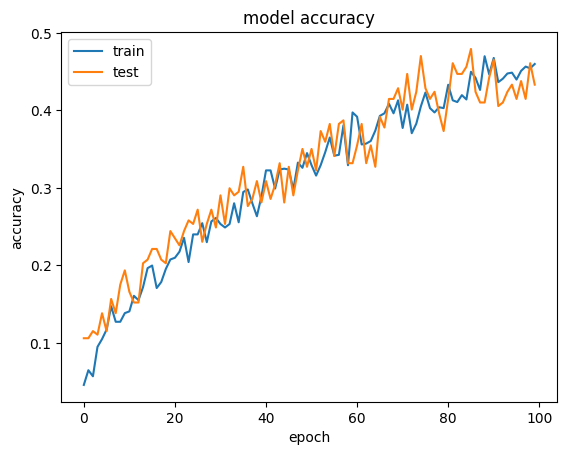

In [ ]:
#plot the model accuracy
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

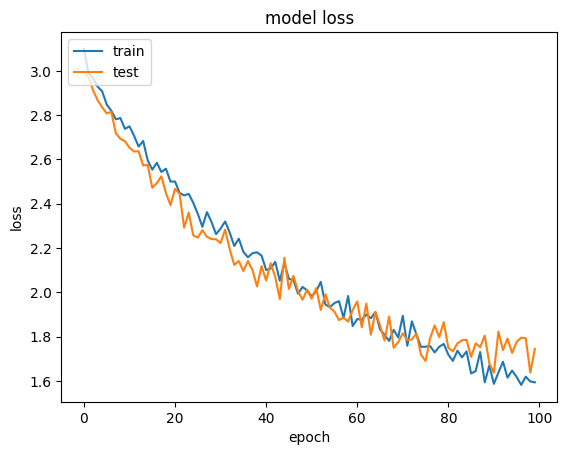

In [ ]:
#plot the model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Attempt 2**

In [ ]:
num_classes = 20
# Define the CNN model
CNNmodel1 = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    Dropout(0.3),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    Dropout(0.3),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    Dropout(0.3),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    Dropout(0.3),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')  # Output layer with the number of classes
])
# Compile the model
CNNmodel1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#fit the model
history1 = CNNmodel1.fit(training_set,
                    steps_per_epoch=len(training_set),
                    epochs=100,
                    verbose=1,
                    validation_data=validation_set,
                    validation_steps = len(validation_set))

Epoch 1/100
28/28 [==============================] - 13s 227ms/step - loss: 3.0094 - accuracy: 0.0513 - val_loss: 2.9944 - val_accuracy: 0.0599
Epoch 2/100
28/28 [==============================] - 5s 181ms/step - loss: 2.9976 - accuracy: 0.0413 - val_loss: 2.9942 - val_accuracy: 0.0691
Epoch 3/100
28/28 [==============================] - 6s 218ms/step - loss: 2.9919 - accuracy: 0.0580 - val_loss: 2.9914 - val_accuracy: 0.0553
Epoch 4/100
28/28 [==============================] - 6s 215ms/step - loss: 2.9915 - accuracy: 0.0636 - val_loss: 2.9939 - val_accuracy: 0.0599
Epoch 5/100
28/28 [==============================] - 5s 178ms/step - loss: 2.9942 - accuracy: 0.0458 - val_loss: 2.9929 - val_accuracy: 0.0461
Epoch 6/100
28/28 [==============================] - 6s 217ms/step - loss: 2.9909 - accuracy: 0.0480 - val_loss: 2.9918 - val_accuracy: 0.0691
Epoch 7/100
28/28 [==============================] - 5s 181ms/step - loss: 2.9945 - accuracy: 0.0491 - val_loss: 2.9924 - val_accuracy: 0.055

In [ ]:
score1 = CNNmodel1.evaluate(validation_set, verbose=0)
print('Test Loss:', score1[0])
print('Test Accuracy:', score1[1])

Test Loss: 2.147327423095703
Test Accuracy: 0.3041474521160126


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


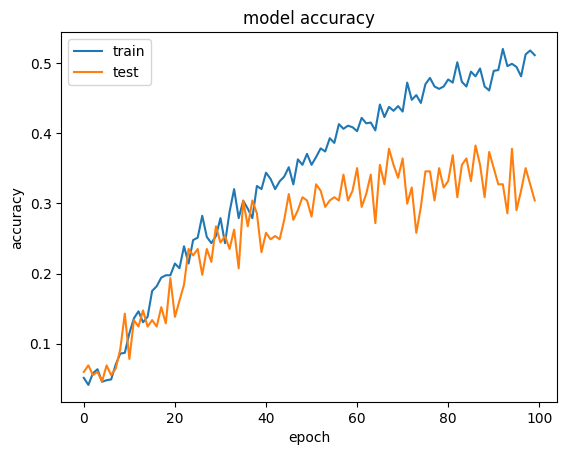

In [ ]:
#plot the model accuracy
print(history1.history.keys())
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

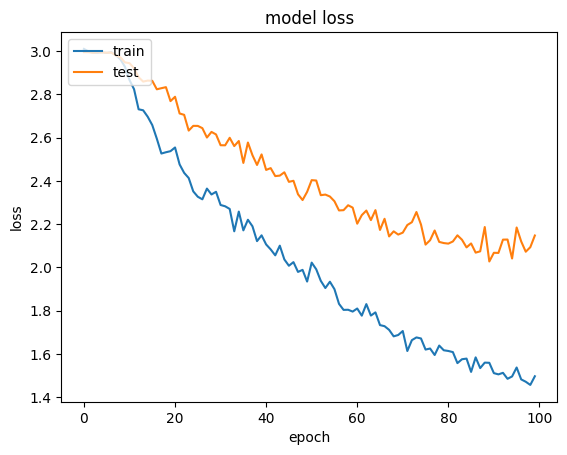

In [ ]:
#plot the model loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Attempt 3**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
#preprocessing
train_datagen1 = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   rotation_range=30,
                                   width_shift_range=0.1,
                                   # randomly shift images
                                   height_shift_range=0.1,
                                   horizontal_flip=True,
                                   vertical_flip=False,
                                   fill_mode='nearest',
                                   validation_split = 0.2,
                                   )

test_datagen1 = ImageDataGenerator(rescale=1./255,
                                  validation_split = 0.2)

In [ ]:
# Extract features for each image
training_set1 = train_datagen1.flow_from_directory(datasetDir,
                                       target_size=(160, 160),
                                                batch_size=32,
                                       color_mode='grayscale',
                                     class_mode='categorical',
                                            subset='training')

validation_set1 = test_datagen1.flow_from_directory(datasetDir,
                                        target_size=(160, 160),
                                                 batch_size=32,
                                      class_mode='categorical',
                                        color_mode='grayscale',
                                               shuffle = False,
                                           subset='validation')

Found 896 images belonging to 20 classes.
Found 217 images belonging to 20 classes.


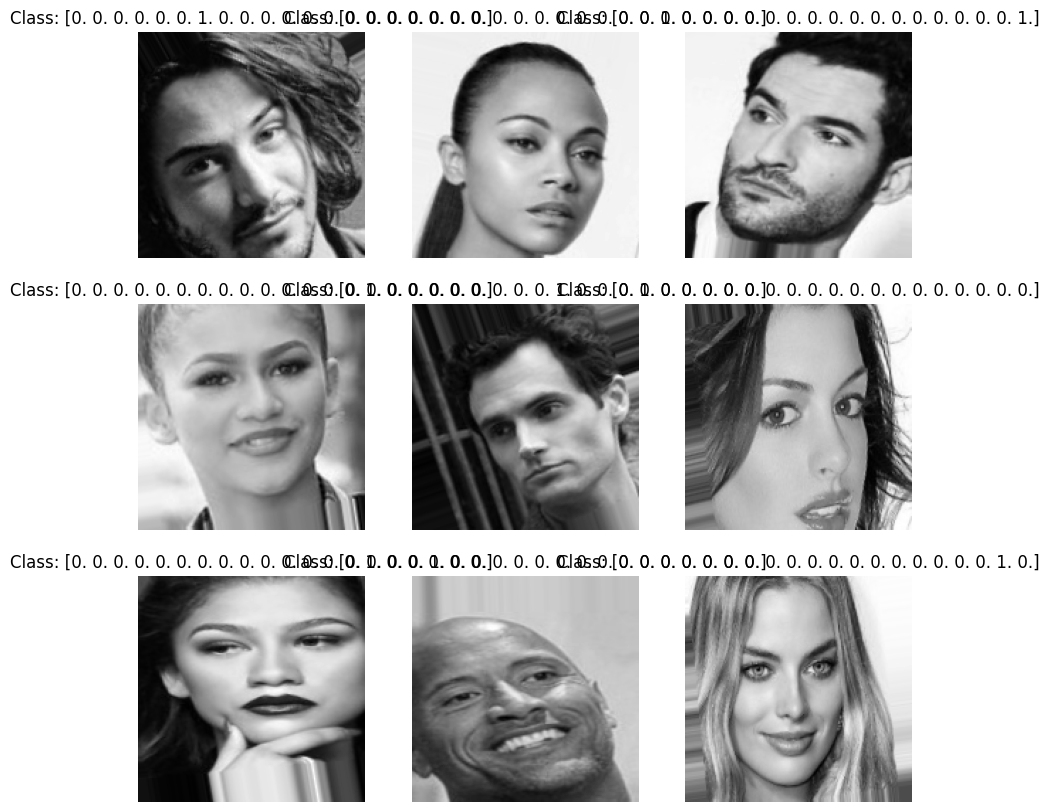

In [ ]:
# Show preprocessed images from the training set
images, labels2 = next(training_set1)

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].reshape(160, 160), cmap='gray')  # Reshape grayscale image
    plt.title(f'Class: {labels2[i]}')
    plt.axis('off')
plt.show()

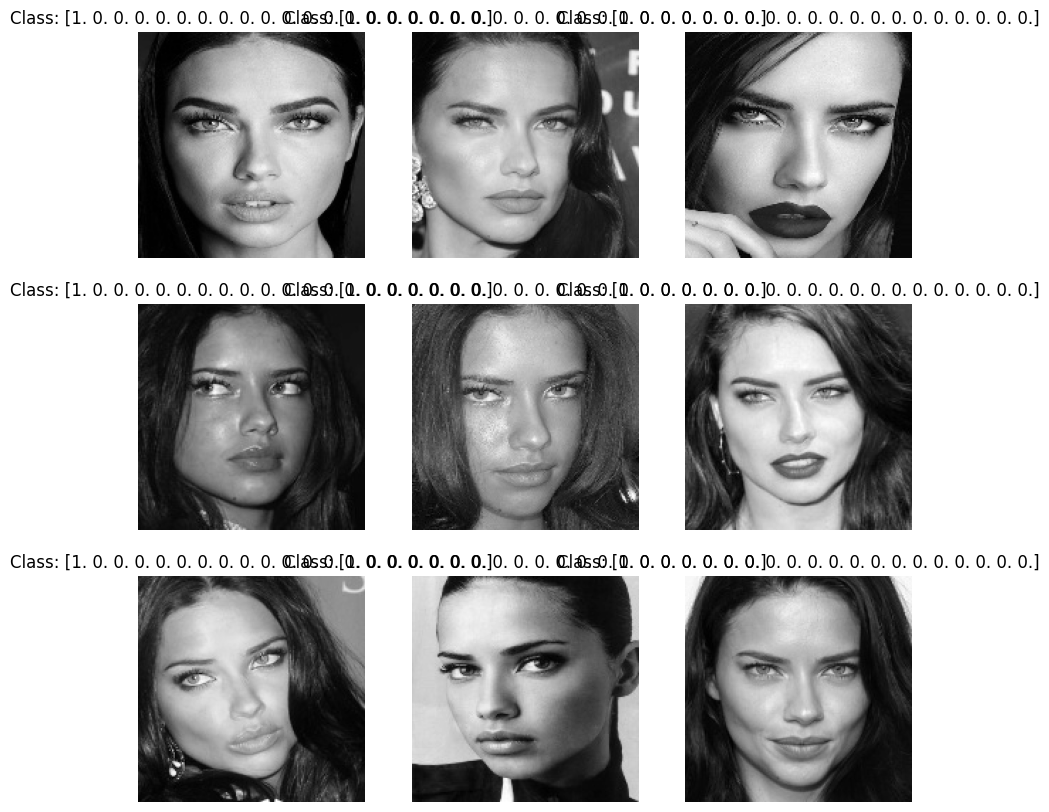

In [ ]:
# Show preprocessed images from the test set
images1, labels3 = next(validation_set1)

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images1[i].reshape(160, 160), cmap='gray')  # Reshape grayscale image
    plt.title(f'Class: {labels3[i]}')
    plt.axis('off')
plt.show()

In [ ]:
num_classes = 20
# Define the CNN model
CNNmodel2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(160, 160, 1)),
    Dropout(0.1),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax', kernel_regularizer=regularizers.l2(0.09))  # Output layer with the number of classes
])

In [ ]:
# Compile the model
CNNmodel2.compile(optimizer=Adam(learning_rate=0.0010), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#fit the model
history2 = CNNmodel2.fit(training_set1,
                    steps_per_epoch= len(training_set1),
                    epochs=120,
                    verbose=1,
                    validation_data=validation_set1,
                    validation_steps = len(validation_set1))

Epoch 1/120
28/28 [==============================] - 58s 2s/step - loss: 2.9879 - accuracy: 0.2254 - val_loss: 3.2912 - val_accuracy: 0.2166
Epoch 2/120
28/28 [==============================] - 58s 2s/step - loss: 2.8094 - accuracy: 0.2522 - val_loss: 3.2027 - val_accuracy: 0.2212
Epoch 3/120
28/28 [==============================] - 56s 2s/step - loss: 2.6549 - accuracy: 0.2712 - val_loss: 3.0910 - val_accuracy: 0.3687
Epoch 4/120
28/28 [==============================] - 58s 2s/step - loss: 2.5408 - accuracy: 0.2969 - val_loss: 2.9397 - val_accuracy: 0.2949
Epoch 5/120
28/28 [==============================] - 56s 2s/step - loss: 2.4535 - accuracy: 0.3170 - val_loss: 2.8683 - val_accuracy: 0.3871
Epoch 6/120
28/28 [==============================] - 57s 2s/step - loss: 2.3855 - accuracy: 0.3092 - val_loss: 2.7877 - val_accuracy: 0.2995
Epoch 7/120
28/28 [==============================] - 56s 2s/step - loss: 2.3243 - accuracy: 0.3214 - val_loss: 2.7050 - val_accuracy: 0.3180
Epoch 8/120
2

In [ ]:
score2 = CNNmodel2.evaluate(validation_set1, verbose=0)
print('Test Loss:', score1[0])
print('Test Accuracy:', score1[1])

Test Loss: 0.9239554405212402
Test Accuracy: 0.7465437650680542


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


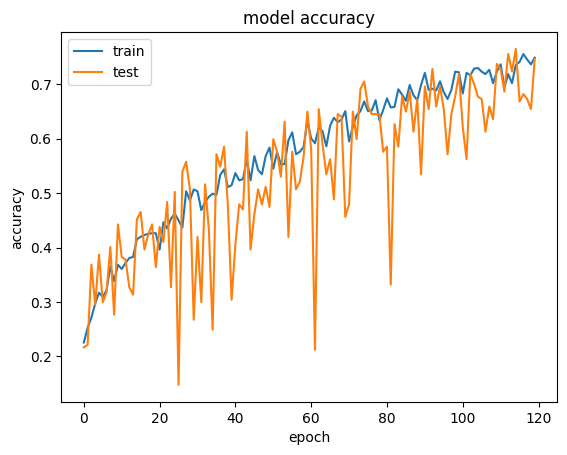

In [ ]:
#plot the model accuracy
print(history2.history.keys())
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

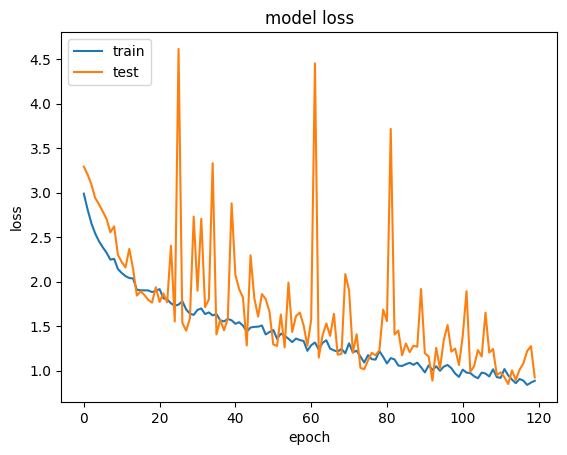

In [ ]:
#plot the model loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
predictions = CNNmodel2.predict(validation_set1)

# Convert predicted probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Convert true labels to class labels
true_classes = validation_set1.classes

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

7/7 [==============================] - 3s 369ms/step


<Figure size 1000x800 with 0 Axes>

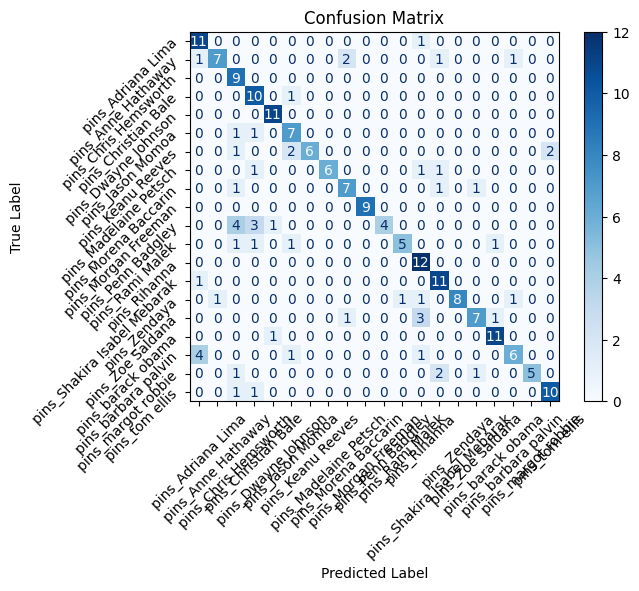

<Figure size 1000x800 with 0 Axes>

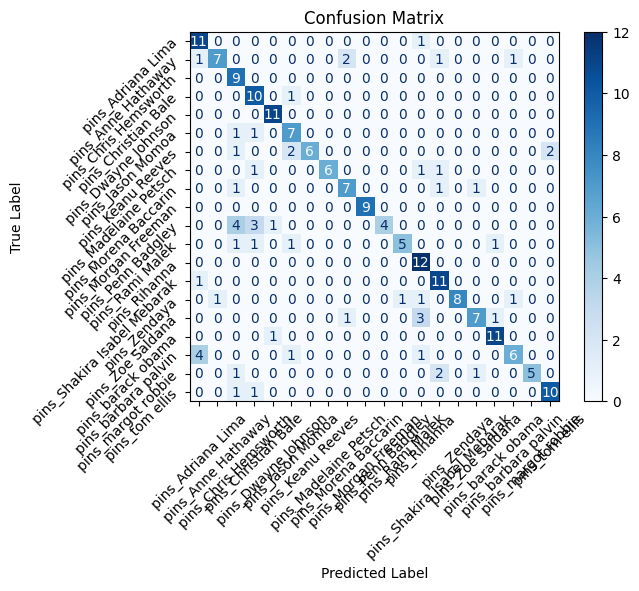

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=validation_set1.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

<Figure size 1000x800 with 0 Axes>

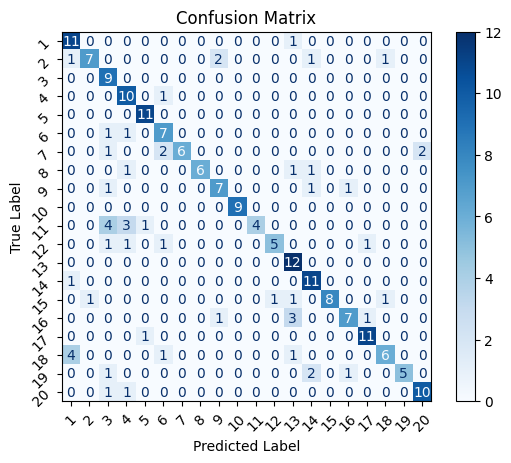

In [ ]:
# Plot confusion matrix with a numerical label
plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [ ]:
# Compute TP, FP, TN, FN from the confusion matrix
TP = cm.diagonal()
FP = cm.sum(axis=0) - TP
FN = cm.sum(axis=1) - TP
TN = cm.sum() - (TP + FP + FN)

# Calculate precision, recall, FPR, FNR
precision = TP / (TP + FP)
recall = TP / (TP + FN)
FPR = FP / (FP + TN)
FNR = FN / (FN + TP)

print("Precision:", np.round(precision,2))
print("Recall:", np.round(recall,2))
print("False Positive Rate (FPR):", np.round(FPR,2))
print("False Negative Rate (FNR):", np.round(FNR,2))


Precision: [0.65 0.88 0.47 0.59 0.85 0.58 1.   1.   0.7  1.   1.   0.83 0.63 0.69
 1.   0.78 0.85 0.75 1.   0.83]
Recall: [0.92 0.58 1.   0.91 1.   0.78 0.55 0.67 0.7  1.   0.33 0.56 1.   0.92
 0.67 0.58 0.92 0.5  0.56 0.83]
False Positive Rate (FPR): [0.03 0.   0.05 0.03 0.01 0.02 0.   0.   0.01 0.   0.   0.   0.03 0.02
 0.   0.01 0.01 0.01 0.   0.01]
False Negative Rate (FNR): [0.08 0.42 0.   0.09 0.   0.22 0.45 0.33 0.3  0.   0.67 0.44 0.   0.08
 0.33 0.42 0.08 0.5  0.44 0.17]


In [ ]:
# Calculate average precision, recall, FPR, FNR
avg_precision = np.mean(precision)
avg_recall = np.mean(recall)
mean_FPR = np.mean(FPR)
mean_FNR = np.mean(FNR)

print("Average Precision:",  np.round(avg_precision,2))
print("Average Recall:", np.round(avg_recall,2))
print("Mean False Positive Rate (FPR):", np.round(mean_FPR,2))
print("Mean False Negative Rate (FNR):", np.round(mean_FNR,2))

Average Precision: 0.8
Average Recall: 0.75
Mean False Positive Rate (FPR): 0.01
Mean False Negative Rate (FNR): 0.25
